1) Delivery_time -> Predict delivery time using sorting time 

2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# Question 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
delivery_time=pd.read_csv("C:\\Users\\avina\\Documents\\Data Science\\Assignments\\004. Simple linear Regression\\delivery_time.csv")
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
delivery_time=delivery_time.rename({"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},axis=1)
delivery_time.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
# Correlation  
delivery_time.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


Correlation between delivery time and sorting time is 0.825997

In [6]:
import seaborn as sns

C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

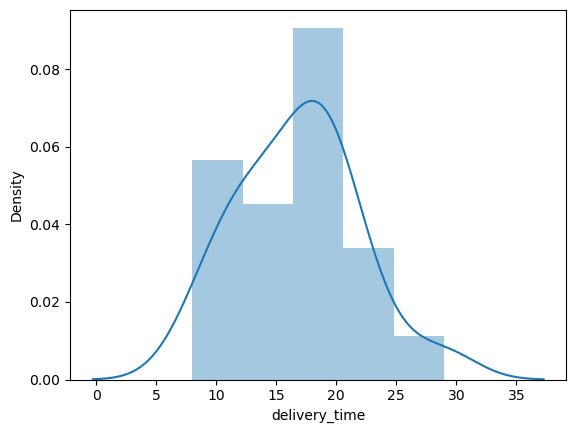

In [7]:
sns.distplot(delivery_time["delivery_time"])

C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

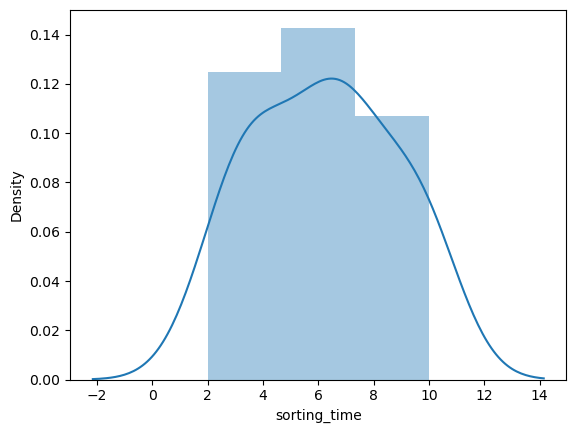

In [8]:
sns.distplot(delivery_time["sorting_time"])

Fitting linear reggression model

In [9]:
import statsmodels.formula.api as smf
model=smf.ols('delivery_time~sorting_time',data=delivery_time).fit()

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

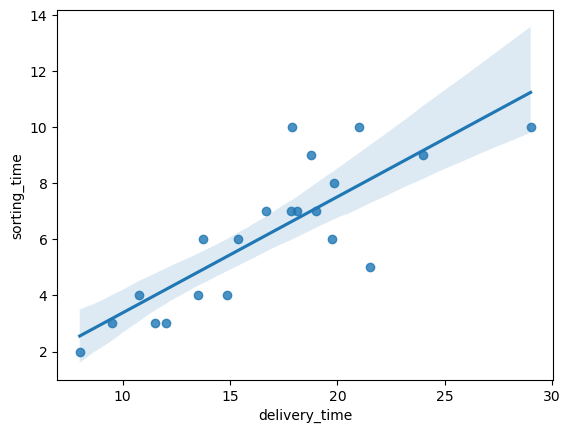

In [10]:
sns.regplot(x='delivery_time',y='sorting_time',data=delivery_time)

In [11]:
# coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [12]:
# t and p - values
print(model.tvalues,'/n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 /n Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [13]:
# r squared values
print(model.rsquared)

0.6822714748417231


Here,

inorder to increase the r-squared value for a good fit transformations on independent variable have to be done.

so, considering this model as model_1

In [14]:
model_1=smf.ols('delivery_time~sorting_time',data=delivery_time).fit()
model_1R=model_1.rsquared

In [15]:
model_2=smf.ols('delivery_time~np.log(sorting_time)',data=delivery_time).fit()
model_2R=model_2.rsquared

In [16]:
model_3=smf.ols('delivery_time~np.sqrt(sorting_time)',data=delivery_time).fit()
model_3R=model_3.rsquared

In [17]:
model_4=smf.ols('delivery_time~np.cbrt(sorting_time)',data=delivery_time).fit()
model_4R=model_4.rsquared

In [18]:
model_5=smf.ols('delivery_time~np.exp(sorting_time)',data=delivery_time).fit()
model_5R=model_5.rsquared

In [19]:
print("r-squared value for model_1: ",model_1R,'\n',
     "r-squared value for model_2: ",model_2R,'\n',
     "r-squared value for model_3: ",model_3R,'\n',
     "r-squared value for model_4: ",model_4R,'\n',
     "r-squared value for model_5: ",model_5R,'\n',)

r-squared value for model_1:  0.6822714748417231 
 r-squared value for model_2:  0.6954434611324223 
 r-squared value for model_3:  0.6958062276308671 
 r-squared value for model_4:  0.6974182292354247 
 r-squared value for model_5:  0.3611177022709089 



Model 4 have the maximum r-squared value.

So, we choose model 4

In [20]:
# Prediction for new data points

new_data=pd.Series([12,15,18,23,28])

In [21]:
data_pred=pd.DataFrame(new_data,columns=["sorting_time"])
data_pred

,sorting_time
0,12
1,15
2,18
3,23
4,28


In [22]:
pred=model_4.predict(data_pred)
print(pred)
pred=pd.DataFrame(pred,columns=["predicted_delivery_time"])
pred

0    24.518867
1    27.306264
2    29.742771
3    33.260856
4    36.299558
dtype: float64


,predicted_delivery_time
0,24.518867
1,27.306264
2,29.742771
3,33.260856
4,36.299558


# Question 2

In [23]:
import numpy as np
import pandas as pd

In [24]:
salary=pd.read_csv("C:\\Users\\avina\\Documents\\Data Science\\Assignments\\004. Simple linear Regression\\Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [25]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [26]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [27]:
salary=salary.rename({'YearsExperience':'exp','Salary':'salary'},axis=1)
salary.head()

,exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [28]:
salary.corr()

,exp,salary
exp,1.000000,0.978242
salary,0.978242,1.000000


Correlation between salary and experience is 0.978242

In [29]:
# Visualisation
import seaborn as sns

C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exp', ylabel='Density'>

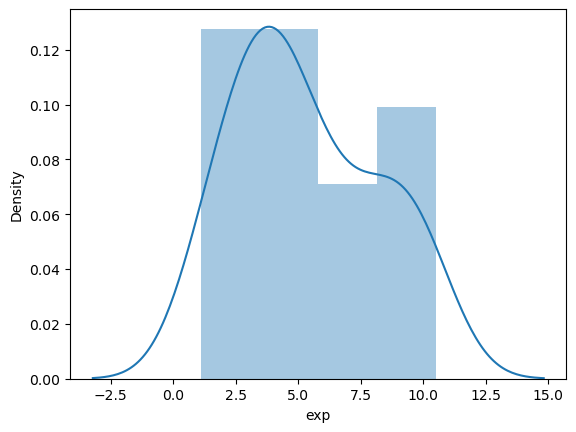

In [30]:
sns.distplot(salary['exp'])

C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

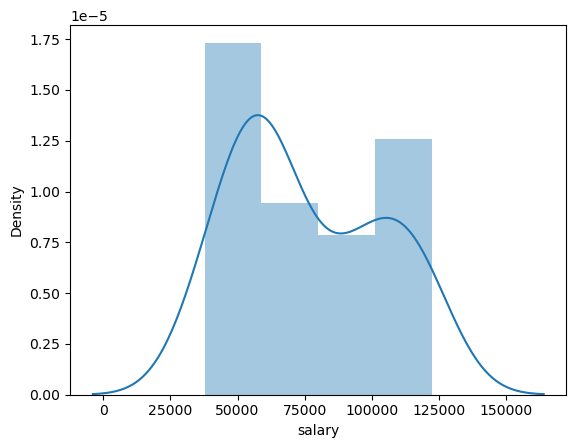

In [31]:
sns.distplot(salary['salary'])

Fitting linear regression model

<AxesSubplot:xlabel='salary', ylabel='exp'>

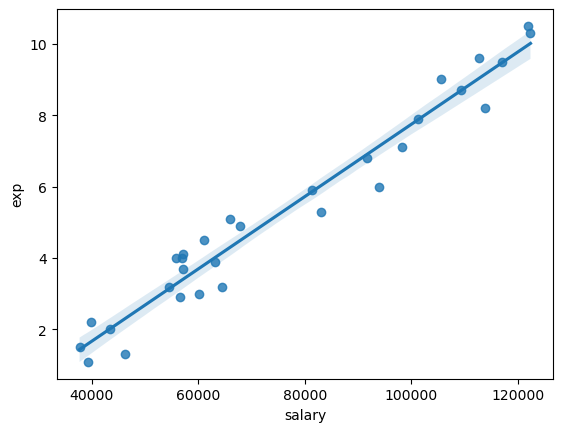

In [32]:
sns.regplot(x='salary',y='exp',data=salary)

In [33]:
import statsmodels.formula.api as smf
model_s=smf.ols('salary~exp',data=salary).fit()

In [34]:
# coefficients
model_s.params

Intercept    25792.200199
exp           9449.962321
dtype: float64

In [35]:
# t-value and p-value
print("t-value: ",model_s.tvalues)
print("p-value: ",model_s.pvalues)

t-value:  Intercept    11.346940
exp          24.950094
dtype: float64
p-value:  Intercept    5.511950e-12
exp          1.143068e-20
dtype: float64


In [36]:
# r-squared value
rsquare=model_s.rsquared
print(rsquare)

0.9569566641435086


Here, r-squared value is enough (close to 1) to fit perfect linear regression model.

So, we don't have to perform any transformations 

In [37]:
model_s1=smf.ols('salary~exp',data=salary).fit()
model_s1R=model_s1.rsquared

In [38]:
model_s2=smf.ols('salary~np.log(exp)',data=salary).fit()
model_s2R=model_s2.rsquared

In [39]:
model_s3=smf.ols('salary~np.sqrt(exp)',data=salary).fit()
model_s3R=model_s3.rsquared

In [40]:
model_s4=smf.ols('salary~np.cbrt(exp)',data=salary).fit()
model_s4R=model_s4.rsquared

In [41]:
model_s5=smf.ols('salary~np.exp(exp)',data=salary).fit()
model_s5R=model_s5.rsquared

In [42]:
print("r-squared value for model_1: ",model_s1R,'\n',
     "r-squared value for model_2: ",model_s2R,'\n',
     "r-squared value for model_3: ",model_s3R,'\n',
     "r-squared value for model_4: ",model_s4R,'\n',
     "r-squared value for model_5: ",model_s5R,'\n',)

r-squared value for model_1:  0.9569566641435086 
 r-squared value for model_2:  0.853888882875697 
 r-squared value for model_3:  0.9310009544993526 
 r-squared value for model_4:  0.9113098800320786 
 r-squared value for model_5:  0.47238440560728734 



- model_s1 have the highest r-squared value 
  
  so it is a good fit

In [43]:
# Prediction for new data points
# ie, for new experience

newdata_s=pd.Series([8,11,16,21,28])
newdata_s

0     8
1    11
2    16
3    21
4    28
dtype: int64

In [44]:
pred_s=pd.DataFrame(newdata_s,columns=["exp"])
pred_s

,exp
0,8
1,11
2,16
3,21
4,28


In [45]:
pred_final=model_s1.predict(pred_s)
print(pred_final)
pred_final=pd.DataFrame(pred_final,columns=['Predicted salary'])
pred_final

0    101391.898770
1    129741.785735
2    176991.597342
3    224241.408949
4    290391.145199
dtype: float64


,Predicted salary
0,101391.898770
1,129741.785735
2,176991.597342
3,224241.408949
4,290391.145199


In [46]:
from pickle import dump
from pickle import load

In [47]:
# save the model
file_name='model.sav'
dump(model_s1,open('file_name','wb'))

In [48]:
# load model
loaded_model=load(open('file_name','rb'))

In [49]:
loaded_model

In [50]:
file_name

'model.sav'